In [1]:
!pip install yfinance

[*********************100%***********************]  1 of 1 completed


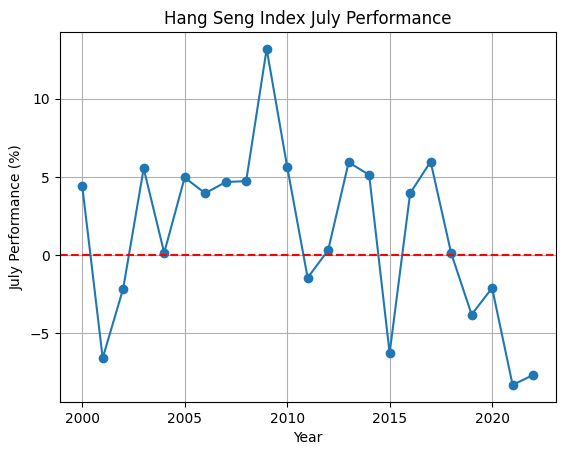

Number of years with positive return: 15
Number of years with negative return: 8
Average July return: 0.48%


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

def calculate_july_performance(symbol):
    # Retrieve historical data for the specified symbol
    data = yf.download(symbol, start="2000-01-01", end="2022-12-31")

    # Extract July data for each year
    july_data = []
    for year in range(1960, 2023):
        start_date = f"{year}-07-01"
        end_date = f"{year}-07-31"
        july_data.append(data.loc[start_date:end_date])

    # Calculate percentage change for each July
    july_performance = []
    for july in july_data:
        if not july.empty:
            start_price = july["Close"].iloc[0]
            end_price = july["Close"].iloc[-1]
            percentage_change = (end_price - start_price) / start_price * 100
            july_performance.append(percentage_change)
        else:
            july_performance.append(None)  # Add None for years with missing data

    return july_performance


def analyze_july_performance(july_performance):
    up_years = 0
    down_years = 0
    total_return = 0

    for performance in july_performance:
        if performance is not None:
            total_return += performance
            if performance > 0:
                up_years += 1
            elif performance < 0:
                down_years += 1

    average_return = total_return / len(july_performance)

    return up_years, down_years, average_return


def plot_july_performance(july_performance):
    years = range(1960, 2023)
    plt.plot(years, july_performance, marker="o")
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Year")
    plt.ylabel("July Performance (%)")
    plt.title("Hang Seng Index July Performance")
    plt.xticks(range(2000, 2023, 5))
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    symbol = "^HSI"  # Symbol for Hang Seng Index
    july_performance = calculate_july_performance(symbol)
    plot_july_performance(july_performance)

    up_years, down_years, average_return = analyze_july_performance(july_performance)
    print(f"Number of years with positive return: {up_years}")
    print(f"Number of years with negative return: {down_years}")
    print(f"Average July return: {average_return:.2f}%")